In [6]:
from google.colab import files

# This will open a file picker
uploaded = files.upload()

Saving plastic_prod.csv to plastic_prod.csv
Saving plastic_waste.csv to plastic_waste.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sns.set(style="whitegrid")

In [8]:
# Load plastic waste dataset
df_waste = pd.read_csv("plastic_waste.csv")

# Load plastic production dataset
df_prod = pd.read_csv("plastic_prod.csv")

# Check first few rows
df_waste.head(), df_prod.head()

(         Country  Total_Plastic_Waste_MT           Main_Sources  \
 0          China                   59.08   Packaging_Industrial   
 1  United States                   42.02     Packaging_Consumer   
 2          India                   26.33         Consumer_Goods   
 3          Japan                    7.99  Packaging_Electronics   
 4        Germany                    6.28   Automotive_Packaging   
 
    Recycling_Rate  Per_Capita_Waste_KG Coastal_Waste_Risk  
 0            29.8                 41.2               High  
 1            32.1                127.5             Medium  
 2            11.5                 19.3               High  
 3            84.8                 63.2             Medium  
 4            56.1                 75.6                Low  ,
                 Entity  Year  Plastic waste generation (tonnes, total)
 0              Albania  2010                                     73364
 1              Algeria  2010                                   1898343
 2     

In [9]:
# Check info
df_waste.info()
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 165 non-null    object 
 1   Total_Plastic_Waste_MT  165 non-null    float64
 2   Main_Sources            165 non-null    object 
 3   Recycling_Rate          165 non-null    float64
 4   Per_Capita_Waste_KG     165 non-null    float64
 5   Coastal_Waste_Risk      165 non-null    object 
dtypes: float64(3), object(3)
memory usage: 7.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Entity                                    168 non-null    object
 1   Year                                      168 non-null    int64 
 2   Plastic waste generation (tonne

In [11]:
# Drop duplicates
df_waste.drop_duplicates(inplace=True)
df_prod.drop_duplicates(inplace=True)

# Handle missing values
df_waste.fillna(df_waste.mean(numeric_only=True), inplace=True)
df_prod.ffill(inplace=True)  # forward-fill production years

In [12]:
df_waste.columns = df_waste.columns.str.strip().str.lower().str.replace(" ", "_")
df_prod.columns = df_prod.columns.str.strip().str.lower().str.replace(" ", "_")

In [14]:
print(df_waste.columns)
print(df_prod.columns)

Index(['country', 'total_plastic_waste_mt', 'main_sources', 'recycling_rate',
       'per_capita_waste_kg', 'coastal_waste_risk'],
      dtype='object')
Index(['entity', 'year', 'plastic_waste_generation_(tonnes,_total)'], dtype='object')


In [15]:
df_prod['year'] = df_prod['year'].astype(int)

In [16]:
df_waste.to_csv("plastic_waste_clean.csv", index=False)
df_prod.to_csv("plastic_prod_clean.csv", index=False)

In [17]:
files.download("plastic_waste_clean.csv")
files.download("plastic_prod_clean.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

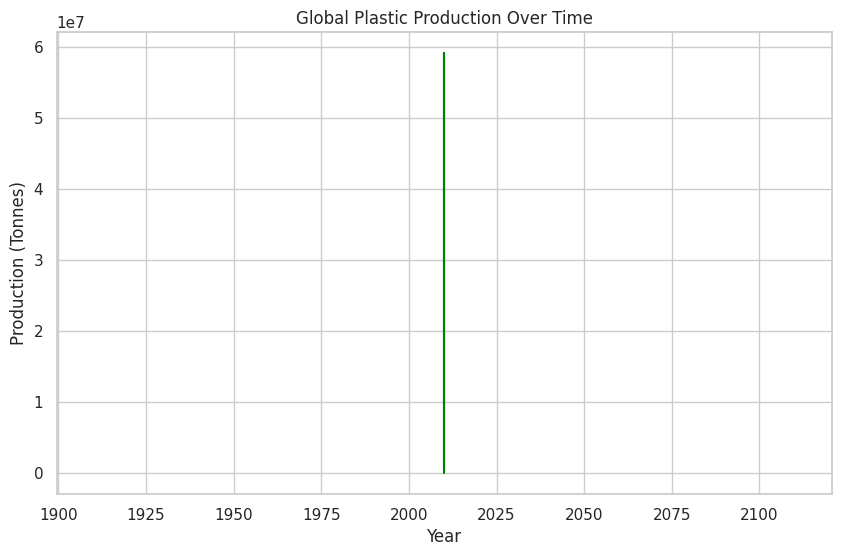

In [19]:
plt.figure(figsize=(10,6))
plt.plot(df_prod['year'], df_prod['plastic_waste_generation_(tonnes,_total)'], color='green')
plt.title("Global Plastic Production Over Time")
plt.xlabel("Year")
plt.ylabel("Production (Tonnes)")
plt.show()

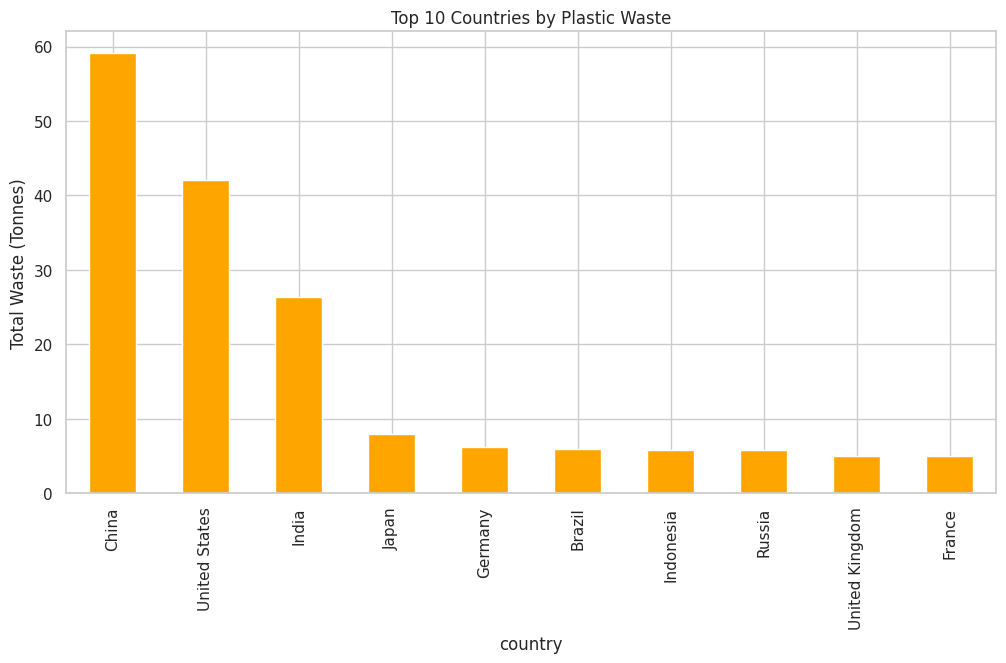

In [21]:
top_countries = df_waste.groupby('country')['total_plastic_waste_mt'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
top_countries.plot(kind='bar', color='orange')
plt.title("Top 10 Countries by Plastic Waste")
plt.ylabel("Total Waste (Tonnes)")
plt.show()